In [54]:
# functions for fetching data 

import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("zestawy danych", "housing")
FILE_NAME = "housing.tgz"
URL = DOWNLOAD_ROOT+ "datasets/housing/housing.tgz"

def _fetch_tar_data (url, housing_path, filename):
    os.makedirs(housing_path, exist_ok=True)  # make dirs if not existed
    file_path = os.path.join(housing_path,filename)  # file path to saving downloaded file
    urllib.request.urlretrieve(url, file_path) # downloading file
    file = tarfile.open(file_path) # opening...
    file.extractall(path = housing_path) # ...and extracting data
    file.close()

def fetch_housing_data(url=URL, housing_path=HOUSING_PATH, filename=FILE_NAME):
    _fetch_tar_data(url, housing_path, filename)

In [55]:
# downloading and saving data as .csv
fetch_housing_data()

In [56]:
# creating dataframe
import pandas as pd
csv_path = os.path.join(HOUSING_PATH,"housing.csv")
housing_data = pd.read_csv(csv_path)

In [57]:
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [58]:
# prescreening and data overlook
print(housing_data.info(),"\n", housing_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None 
           longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.1359

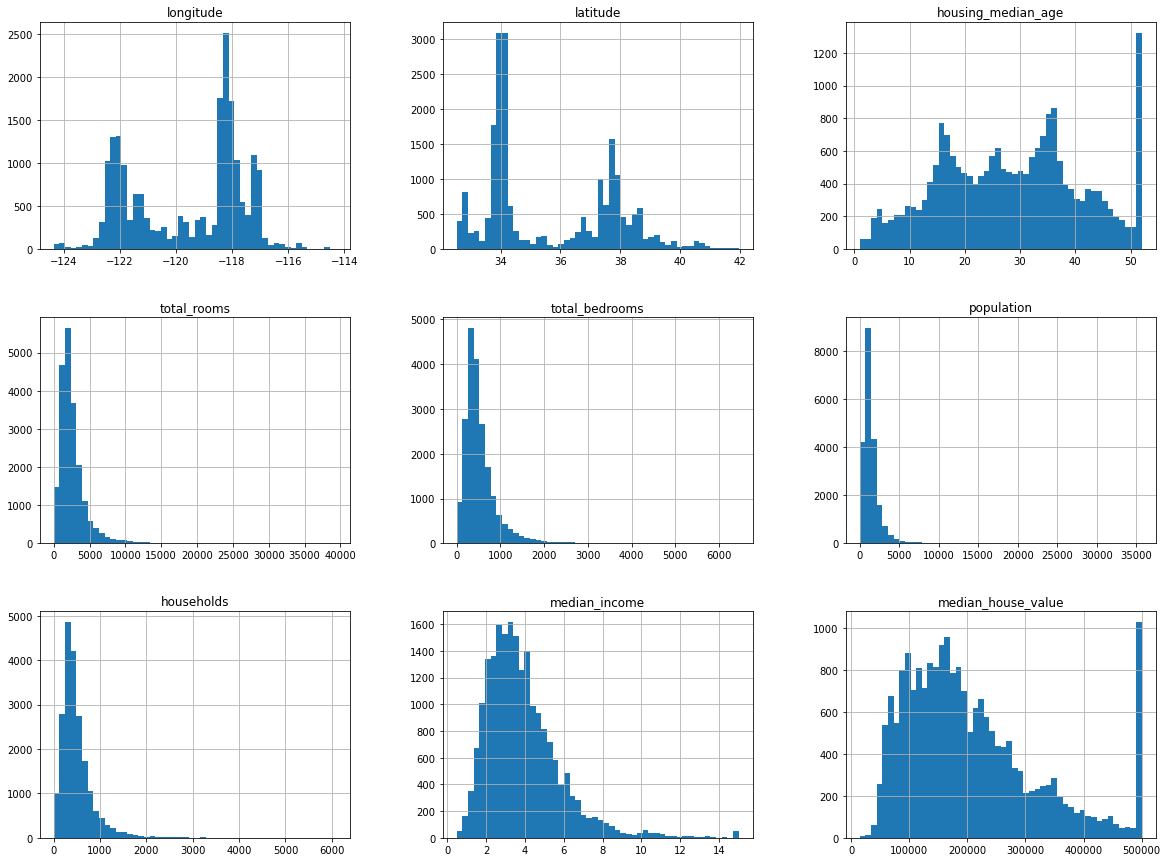

In [42]:
# basic visualisation of numerical data
import matplotlib.pyplot as plt
housing_data.hist(bins = 50, figsize=(20,15))
plt.show()

<AxesSubplot:>

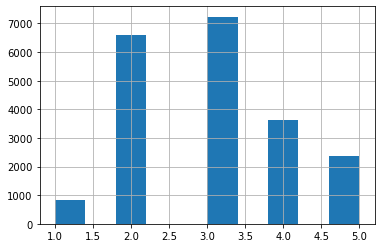

In [9]:
#creating categorical data based on numerical feature
import numpy as np
housing_data['income_cat'] = pd.cut(housing_data['median_income'], 
                                    bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels = [1,2,3,4,5])
housing_data['income_cat'].hist()

In [10]:
# split data for testing and train set considering distribution of categories in 'income_cat'

from sklearn.model_selection import StratifiedShuffleSplit
split  = StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_idx]
    strat_test_set = housing_data.loc[test_idx]

In [11]:
#stratification test
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [96]:
#stratification test
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [12]:
for set_ in [strat_test_set, strat_train_set]:
    set_.drop(columns = 'income_cat', inplace = True)

In [13]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

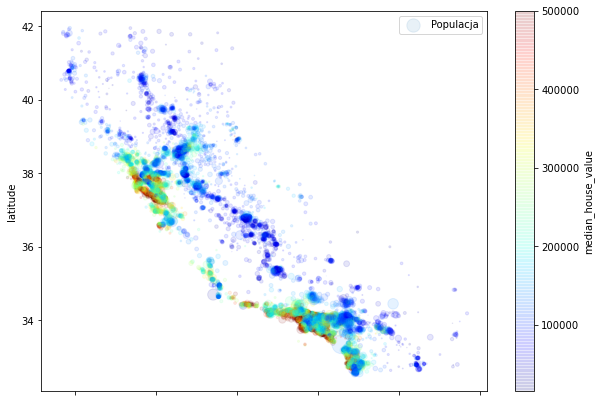

In [62]:
# wykres oparty o współrzędne geograficzne
housing.plot(kind = 'scatter', 
             x = 'longitude', 
             y = 'latitude', 
             alpha = 0.1,
             s = housing['population']/100,
             label = 'Populacja',
             figsize = (10,7),
             c = "median_house_value",
             cmap = plt.get_cmap("jet"),
             colorbar = True)

In [14]:
# calc correlation
corr_matrix = housing.corr()

In [68]:
import matplotlib
import matplotlib.pyplot as plt
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

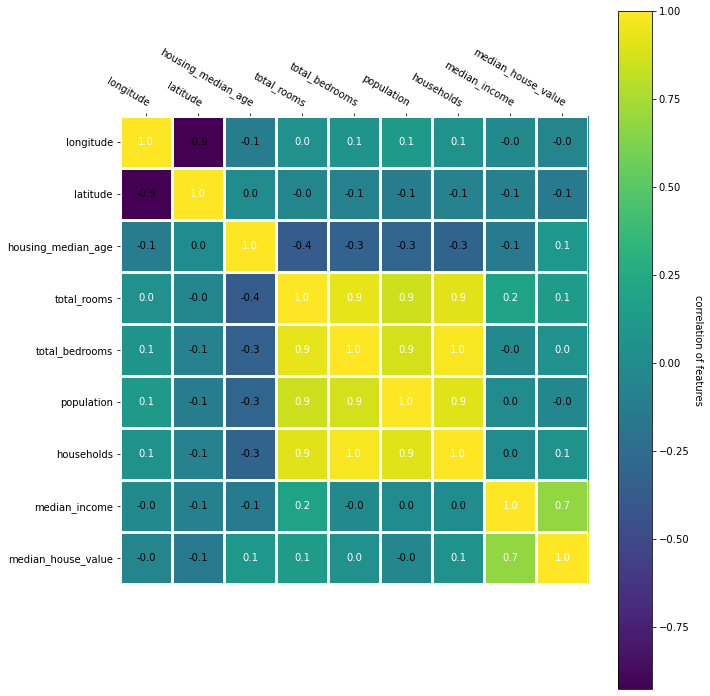

In [79]:
fig, ax = plt.subplots(figsize = (10,10))

im, cbar = heatmap(corr_matrix, list(corr_matrix.columns), list(corr_matrix.columns), ax=ax,
                   cmap="viridis", cbarlabel="correlation of features")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.show()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

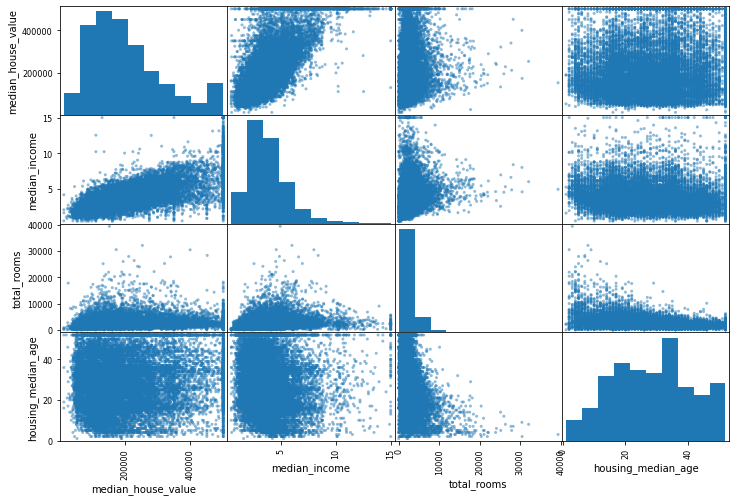

In [81]:
#scatter_matrix
from pandas.plotting import scatter_matrix
interesting_features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[interesting_features], figsize = (12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

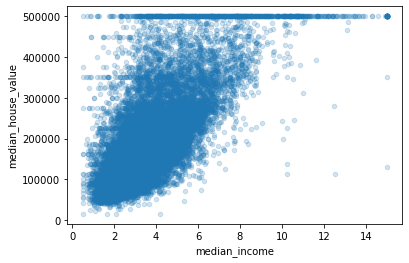

In [82]:
housing.plot(kind = 'scatter',
             x = 'median_income',
             y = 'median_house_value',
             alpha = 0.2)

In [84]:
#preparing new features
housing['rooms_per_family'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms']  = housing['total_bedrooms']/housing['total_rooms']
housing['Popultion_per_family'] = housing['population']/housing['households']

In [16]:
#preparing data for machine learning alghorithms
X_train = strat_train_set.drop(columns='median_house_value', axis=1)
y_train = strat_train_set['median_house_value'].copy()

In [86]:
# filling nan values in column 'total_bedrooms'
# median_total_bedrooms = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median_total_bedrooms, inplace = True)

In [17]:
# selecting only cat or only numerical cols
X_train_numeric_cols = X_train.select_dtypes(include=np.number).columns
X_train_categorical_cols = X_train.select_dtypes(exclude=np.number).columns

In [18]:
X_train_numeric = X_train[X_train_numeric_cols]
X_train_categorical = X_train[X_train_categorical_cols]

In [19]:
#fill all nan from numercal columns with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median', verbose=1)
imputer.fit(X_train_numeric)
fill_na_median_dict = {col:median for col, median in zip(X_train_numeric.columns,imputer.statistics_)}
X_train_filna = X_train.fillna(value=fill_na_median_dict)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train_categorical_encoded = ordinal_encoder.fit_transform(X_train_categorical)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [127]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_train_categorical_1hot = cat_encoder.fit_transform(X_train_categorical)
X_train_categorical_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [128]:
X_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8297     -118.14     33.76                50.0       2960.0           761.0   
17602    -121.88     37.30                42.0       1867.0           398.0   
5912     -118.44     34.29                32.0       1260.0           382.0   
5050     -118.33     34.02                11.0       1249.0           313.0   
7161     -118.17     34.03                31.0       1014.0           252.0   
...          ...       ...                 ...          ...             ...   
12292    -116.98     33.93                33.0        376.0            83.0   
11810    -121.07     38.92                15.0       5301.0           884.0   
19906    -119.27     36.32                 9.0       3631.0           635.0   
9682     -118.97     37.64                14.0       1847.0           439.0   
19366    -122.96     38.42                50.0       2530.0           524.0   

       population  households  median_income ocean_proximity  
8297       1179.0       718.0         3.5214      NEAR OCEAN  
17602       927.0       389.0         4.3250       <1H OCEAN  
5912       1434.0       342.0         2.0286       <1H OCEAN  
5050        625.0       336.0         0.8702       <1H OCEAN  
7161       1064.0       247.0         2.4167       <1H OCEAN  
...           ...         ...            ...             ...  
12292       267.0        88.0         2.1581          INLAND  
11810      2335.0       831.0         4.5150          INLAND  
19906      1881.0       628.0         4.7723          INLAND  
9682        238.0        98.0         3.6042          INLAND  
19366       940.0       361.0         2.9375       <1H OCEAN  

[16512 rows x 9 columns]

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_fam = X[:,rooms_ix]/X[:, households_ix]
        population_per_fam = X[:,population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedroom_per_room = X[:,bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_fam, population_per_fam, bedroom_per_room]
        else:
            return np.c_[X, rooms_per_fam, population_per_fam]

In [23]:
attr_adder = CombinedAttributesAdder()
X_extra = attr_adder.transform(X_train.values)
X_extra

array([[-118.14, 33.76, 50.0, ..., 4.1225626740947074,
        1.6420612813370474, 0.2570945945945946],
       [-121.88, 37.3, 42.0, ..., 4.799485861182519, 2.3830334190231364,
        0.21317621853240493],
       [-118.44, 34.29, 32.0, ..., 3.6842105263157894, 4.192982456140351,
        0.30317460317460315],
       ...,
       [-119.27, 36.32, 9.0, ..., 5.781847133757962, 2.995222929936306,
        0.1748829523547232],
       [-118.97, 37.64, 14.0, ..., 18.846938775510203,
        2.4285714285714284, 0.23768272874932322],
       [-122.96, 38.42, 50.0, ..., 7.008310249307479, 2.6038781163434903,
        0.20711462450592885]], dtype=object)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [("imputer_median", SimpleImputer(strategy='median')),
        ('attribute_adder', CombinedAttributesAdder()),
        ('scaler', StandardScaler())]

pipeline_num = Pipeline(steps)

# X_train_numeric_pip = pipeline.fit_transform(X_train_numeric)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
steps_2 = [('numerical_col_transform', pipeline_num, X_train_numeric_cols),
          ('cat_col_transform', OneHotEncoder(), X_train_categorical_cols)]
full_pipe = ColumnTransformer(steps_2)
housing_prep = full_pipe.fit_transform(X_train)

In [29]:
# Models training

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lin_reg = lr.fit(housing_prep, y_train)

In [30]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(housing_prep)
mse = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
rmse

68429.66690879458

In [164]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr_reg = dtr.fit(housing_prep, y_train)
preds = dtr_reg.predict(housing_prep)
mse = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
rmse

0.0

In [167]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtr, housing_prep, y_train,
                                   scoring = 'neg_mean_squared_error', cv = 10)
rmse_cv = np.sqrt(-scores)
rmse_cv.mean()

70072.93739916454

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


rfr = RandomForestRegressor(n_estimators = 30, max_features=8)
rfr_reg = rfr.fit(housing_prep, y_train)
scores = cross_val_score(rfr_reg, housing_prep, y_train,
                                   scoring = 'neg_mean_squared_error', cv = 10)
rmse_cv = np.sqrt(-scores)
rmse_cv.mean()

48942.9209435113

In [40]:
import joblib

joblib.dump(rfr_reg,'random_forest_reg.pkl')

['random_forest_reg.pkl']

In [41]:
import joblib
X_test = strat_test_set.drop('median_house_value', axis =1)
y_test = strat_test_set['median_house_value']

model = joblib.load('random_forest_reg.pkl')
X_test_prep = full_pipe.transform(X_test)
final_product = model.predict(X_test_prep)
mse = mean_squared_error(y_test, final_product)
rmse = np.sqrt(mse)
rmse

48852.101641220834

In [43]:
from scipy import stats

coef = 0.95
se = (final_product - y_test) ** 2
np.sqrt(stats.t.interval(coef, len(se)-1,loc=se.mean(), scale = stats.sem(se)))

array([46656.55568959, 50953.13023468])

In [53]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', C=0.2)
svr.fit(housing_prep, y_train)
final_product = svr.predict(X_test_prep)
mse = mean_squared_error(y_test, final_product)
rmse = np.sqrt(mse)
print(f"RMSE : {rmse}")
coef = 0.95
se = (final_product - y_test) ** 2
print(f"{np.sqrt(stats.t.interval(coef, len(se)-1,loc=se.mean(), scale = stats.sem(se)))}")

RMSE : 117171.04483852356
[113976.67980998 120280.60507245]
